In [10]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar#线性搜索
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model

### 从训练集中又划分了验证集,线性搜索在验证集上进行,搜索得更快了
#### 使用了更复杂的结构,比之前的能够提升3-4%的准确和召回

In [2]:
#读取数据
X_train = pd.read_csv('../preprocessed_data/X_train.csv',header=None).values
X_test = pd.read_csv('../preprocessed_data/X_test.csv',header=None).values

In [3]:
y_train = pd.read_csv('../preprocessed_data/y_train.csv',header=None)
y_test = pd.read_csv('../preprocessed_data/y_test.csv',header=None)

In [4]:
#对于y_train和y_test,值为'normal'的样本标记为0,其它的样本标记为1
y_train = np.where(y_train == 'normal', 0, 1).reshape(-1)
y_test = np.where(y_test == 'normal', 0, 1).reshape(-1)

In [5]:
#划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [6]:
#提取训练集中的正常样本和异常样本
X_train_normal = X_train[y_train == 0]
X_train_abnormal = X_train[y_train == 1]

In [7]:
#计数正常样本和异常样本的个数
print('正常样本的个数：',X_train_normal.shape[0])
print('异常样本的个数：',X_train_abnormal.shape[0])

正常样本的个数： 60592
异常样本的个数： 52783


In [8]:
#构建一个自动编码器
autoencoder = Sequential([

    Dense(X_train.shape[1], activation='tanh', input_shape=(X_train.shape[1],)),#编码层
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    #Dense(8, activation='tanh'),

    #Dense(16, activation='tanh'),#解码层
    Dense(32, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(X_train.shape[1], activation='linear'),

])
#编译模型
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 123)               15252     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               15872     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_______________________________________

In [9]:
#训练模型
history = autoencoder.fit(X_train_normal, X_train_normal, epochs = 150, batch_size = 2048, validation_split=0.2,verbose=2)
#这里迭代15次，每次的batch_size为256
#备选暴力参数：epochs = 150, batch_size = 2048

2023-09-27 22:47:21.029930: I tensorflow/stream_executor/platform/default/dso_loader.cc:97] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2023-09-27 22:47:21.030090: I tensorflow/stream_executor/platform/default/dso_loader.cc:97] Successfully opened dynamic library libdxcore.so
2023-09-27 22:47:21.039731: I tensorflow/stream_executor/platform/default/dso_loader.cc:97] Successfully opened dynamic library libd3d12.so
2023-09-27 22:47:23.568170: I tensorflow/core/common_runtime/dml/dml_device_cache.cc:250] DirectML device enumeration: found 1 compatible adapters.
2023-09-27 22:47:23.569217: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-09-27 22:47:23.569932: I tensorflow/core/common_runtime/dml/dml_device_cache.cc:186] DirectML: creating device on adapter 0 (AMD Radeon RX 6600M)



Train on 48473 samples, validate on 12119 samples
Epoch 1/150
 - 0s - loss: 0.5243 - val_loss: 0.4275
Epoch 2/150
 - 0s - loss: 0.4377 - val_loss: 0.3829
Epoch 3/150
 - 0s - loss: 0.4004 - val_loss: 0.3510
Epoch 4/150
 - 0s - loss: 0.3716 - val_loss: 0.3246
Epoch 5/150
 - 0s - loss: 0.3488 - val_loss: 0.3056
Epoch 6/150
 - 0s - loss: 0.3334 - val_loss: 0.2943
Epoch 7/150
 - 0s - loss: 0.3212 - val_loss: 0.2822
Epoch 8/150
 - 0s - loss: 0.3103 - val_loss: 0.2735
Epoch 9/150
 - 0s - loss: 0.3012 - val_loss: 0.2636
Epoch 10/150
 - 0s - loss: 0.2932 - val_loss: 0.2558
Epoch 11/150
 - 0s - loss: 0.2864 - val_loss: 0.2497
Epoch 12/150
 - 0s - loss: 0.2795 - val_loss: 0.2429
Epoch 13/150
 - 0s - loss: 0.2727 - val_loss: 0.2362
Epoch 14/150
 - 0s - loss: 0.2671 - val_loss: 0.2301
Epoch 15/150
 - 0s - loss: 0.2606 - val_loss: 0.2231
Epoch 16/150
 - 0s - loss: 0.2558 - val_loss: 0.2175
Epoch 17/150
 - 0s - loss: 0.2491 - val_loss: 0.2112
Epoch 18/150
 - 0s - loss: 0.2436 - val_loss: 0.2073
Epoc

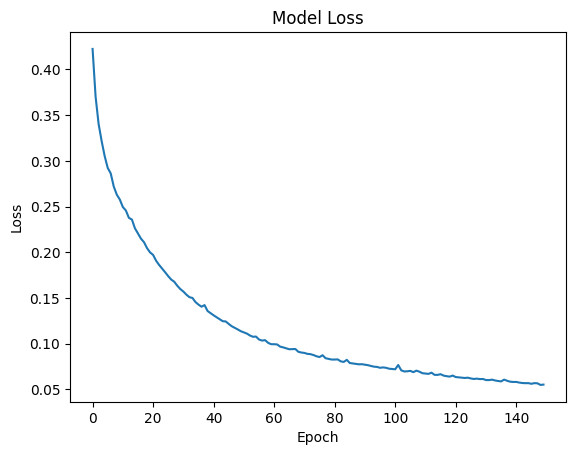

In [ ]:
import matplotlib.pyplot as plt
# 绘制损失值变化曲线
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#使用自动编码器重建训练集
X_train_normal_pred = autoencoder.predict(X_train_normal)
# 对每个样本计算重建误差形成一个向量
reconstruction_errors = np.mean(np.square(X_train_normal - X_train_normal_pred), axis=1)

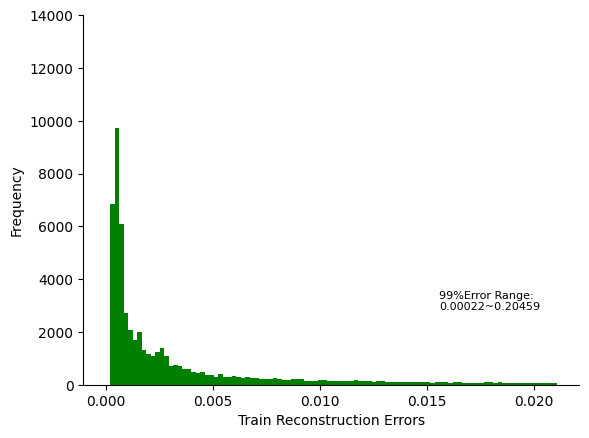

In [ ]:
# 对误差列表中的数绘制直方图
plt.hist(reconstruction_errors, bins=100, 
         range = (round(np.percentile(reconstruction_errors, 5), 2), round(np.percentile(reconstruction_errors, 90), 5)),#显示5%~90%的数据
         color = 'green')
plt.xlabel('Train Reconstruction Errors')
plt.ylabel('Frequency')
plt.ylim(top=14000)
# 去掉右上边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 放置重建误差的范围
plt.text(0.718, 0.202, 
         f'99%Error Range:\n{round(np.min(reconstruction_errors), 5)}~{round(np.percentile(reconstruction_errors, 99), 5)}',
         fontsize = 8,
         transform = ax.transAxes)
plt.show()

def cheat(x):#这是一个作弊的函数,使用测试集,从这里我们可以得到能够优化的上限
    predictions = autoencoder.predict(X_test)
    errors = np.mean(np.power(X_test - predictions, 2), axis=1)  # 计算重构误差
    anomalies = errors > x  # 根据重构误差判断是否为异常样本
    return(-accuracy_score(y_test, anomalies))#化为最小化问题
res = minimize_scalar(cheat, bounds=(0.0, 1.0), method='bounded')#30"
print('理论最大值:', -res.fun)
print('最大值所在的位置:', res.x)

In [ ]:
def fun(x):#定义目标函数
    predictions = autoencoder.predict(X_val)
    errors = np.mean(np.power(X_val - predictions, 2), axis=1)  # 计算重构误差
    anomalies = errors > x  # 根据重构误差判断是否为异常样本
    return(-f1_score(y_val, anomalies))#化为最小化问题
res = minimize_scalar(fun, bounds=(0.0, 1.0), method='bounded')#13"
print('验证集最大F1分数:', -res.fun)
print('最大值所在的位置:', res.x)

验证集最大F1分数: 0.9746271215498028
最大值所在的位置: 0.11470970416357096


In [ ]:
#使用res.x作为最佳重构误差对测试集进行异常检测
predictions = autoencoder.predict(X_test)
errors = np.mean(np.power(X_test - predictions, 2), axis=1)  # 计算重构误差
anomalies = errors > res.x  # 根据重构误差判断是否为异常样本
#计算测试集上的精确率、召回率和F1值
accuracy = accuracy_score(y_test, anomalies)
precision = precision_score(y_test, anomalies)
recall = recall_score(y_test, anomalies)
f1 = f1_score(y_test, anomalies)
print('测试集上的准确率为：',accuracy)
print('测试集上的精确率为：',precision)
print('测试集上的召回率为：',recall)
print('测试集上的F1值为：',f1)


测试集上的准确率为： 0.8906582682753726
测试集上的精确率为： 0.9324324324324325
测试集上的召回率为： 0.8710356113145796
测试集上的F1值为： 0.9006889327585513


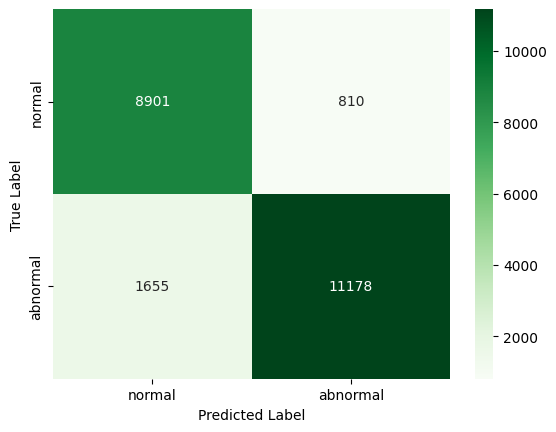

In [ ]:
#绘制混淆矩阵
cm = confusion_matrix(y_test, anomalies)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#使用以往搜索得出的经验常数作为最佳重构误差对测试集进行异常检测
predictions = autoencoder.predict(X_test)
errors = np.mean(np.power(X_test - predictions, 2), axis=1)  # 计算重构误差
anomalies = errors > 0.0911  # 根据重构误差判断是否为异常样本
#计算测试集上的精确率、召回率和F1值
accuracy = accuracy_score(y_test, anomalies)
precision = precision_score(y_test, anomalies)
recall = recall_score(y_test, anomalies)
f1 = f1_score(y_test, anomalies)
print('测试集上的准确率为：',accuracy)
print('测试集上的精确率为：',precision)
print('测试集上的召回率为：',recall)
print('测试集上的F1值为：',f1)

测试集上的准确率为： 0.9086231369765791
测试集上的精确率为： 0.9304035157810627
测试集上的召回率为： 0.9073482428115016
测试集上的F1值为： 0.9187312608489822


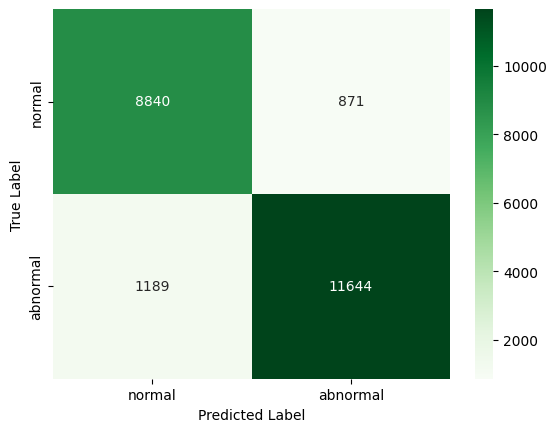

In [ ]:
#绘制混淆矩阵
cm = confusion_matrix(y_test, anomalies)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#导出模型,并记录最佳重构误差
#autoencoder.save(f'autoencoder_{res.x}_{accuracy}.keras')